# ROC Curves and AUC 


## Introduction 

This lesson will introduce ROC: Receiver Operating Characteristic curves and AUC: Area Under [the] Curve.

Some of our accuracy scores thus far probably seem pretty impressive; an 80% accuracy seems pretty darn good on first try! What we have to keep in mind is that when predicting a binary classification, we are bound to be right sometimes, even just by random guessing. For example, I should be roughly 50% accurate in guessing whether or not a coin lands on heads. This also can lead to issues when tuning models down the road. If you have a skewed dataset with rare events (such as a disease or winning the lottery) where there is only 2 positive cases in 1000, then even a trivial algorithm that classifies everything as 'not a member' will achieve an accuracy of 99.8% (998 out of 1000 times it was correct). So remember that an 80% accuracy must be taken into a larger context. AUC is an alternative comprehensive metric to confusion matrices, which we previously examined, and ROC graphs allow us to determine optimal precision-recall tradeoff balances specific to the specific problem we are looking to solve.

## Objectives

You will be able to:

* Evaluate classification models using various metrics
* Define and understand ROC and AUC

## The ROC curve

The Receiver Operater Characteristic curve (ROC curve) which illustrates the false positive against false negative rate of our classifier. When training a classifier, we are hoping the ROC curve will hug the upper left corner of our graph. A classifier with 50-50 accuracy is deemed 'worthless'; this is no better then random guessing, as in the case of a coin flip.

![](./images/roc_comp.jpg)

The ROC curve gives us a graph of the tradeoff between this false positive and true positive rate. The AUC, or area under the curve, gives us a singular metric to compare these. An AUC of 1 being a perfect classifier, and an AUC of .5 being that which has a precision of 50%.

Another perspective to help understand the ROC curve is to think about the underlying model fueling our classification algorithm. Remember that the logistic model produces probabilities that each observation is of a specific class. Imagine that the values produced from the logistic model look something like this:

<img src="./images/decision_boundary_accuracy.png" alt="drawing" width="550px"/>

Here we see the majority of the two classes probabilities land at around .25 or .75. If we alter the cutoff point, we can sacrifice precision, increasing the false positive rate in order to also increase the true positive rate, or vice versa. Imagine here green is the positive case 1 (in this case heart disease) and red the negative case 0. Shifting the decision boundary to the left from 0.5 will result in capturing more of the positive (1) cases. At the same time, we will also pick up some false negatives, those red cases at the far right of the negative (0) case distribution.

<img src="./images/decision_boundary_recall_preferred.png" alt="drawing" width="550px"/>
Models with poor ROC might have large overlaps in the probability estimates for the two classes. This would indicate that the algorithm performed poorly and had difficulty seperating the two classes from each other.

<img src="./images/poor_good_seperability.png" alt="drawing" width="400px"/>



With that, let's take a look at drawing the ROC curve in practice.

## As before let's train a classifier to start

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd


#Load the data
df = pd.read_csv('heart.csv')

#Define appropriate X and y
X = df[df.columns[:-1]]
y = df.target

#Normalize the Data
for col in df.columns:
    df[col] = (df[col]-min(df[col]))/ (max(df[col]) - min(df[col]))

# Split the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Fit a model
logreg = LogisticRegression(fit_intercept = False, C = 1e12) #Starter code
model_log = logreg.fit(X_train, y_train)
print(model_log) #Preview model params

#Predict
y_hat_test = logreg.predict(X_test)

#Data Preview
df.head()

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


## Drawing the ROC Curve
  
In practice, a good way to implement AUC and ROC is via sklearn's  built in methods:

In [2]:
from sklearn.metrics import roc_curve, auc

In [3]:
#scikit learns built in roc_curve method returns the fpr, tpr and thresholds
#for various decision boundaries given the case member probabilites

#First calculate the probability scores of each of the datapoints:
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


From there we can easily calculate the AUC:

In [4]:
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.8738548273431994


## Putting it all together as a cohesive visual

AUC: 0.8738548273431994


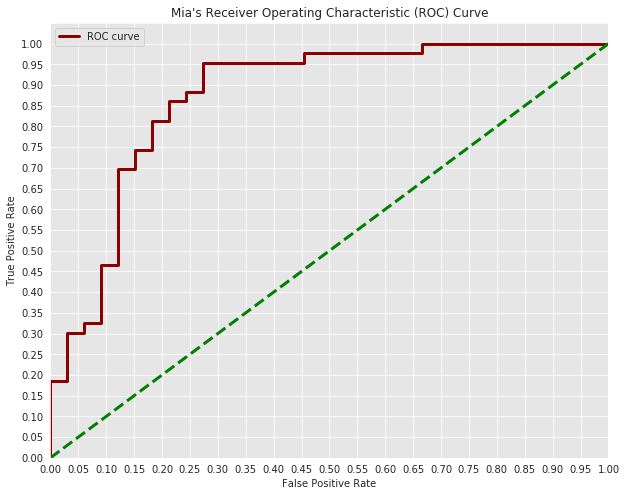

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Seaborn's Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 3
plt.plot(fpr, tpr, color='darkred',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Mia's Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="upper left")
plt.show()

## Summary

In this lesson, we investigated another evaluation for classification algorithms (including logistic regression). Namely, we looked at Receiver Operating Characteristic curves (ROC) which graph the False Positive Rate against the True Positive Rate. The overall accuracy of a classifier can thus be quanitified by the AUC, the Area Under [this] Curve. Perfect classifiers would have an AUC score of 1.0 while and AUC of .5 is deemed trivial or worthless.